In [19]:
# Libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

In [20]:
#Número de exemplos
M = 1000

#Criação de features
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)

#Criação de ruído
w = np.random.randn(M, 1)

#Criação de labels
y = 2*x1 + 2*x2 + w

#Tamanho do mini-batch
minibatch_size = int(100)

In [21]:
#Fórmula fechada
X = np.c_[x1, x2]

a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2))

In [22]:
#Criação de pontos para plotar superfície de erro
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Pontos para o plot da função de custo.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat))

In [23]:
#Criação de variáveis para armazenar histórico de valores
alpha = 0.1
iteration = 0
n_iterations = minibatch_size
erro = 1

#histórico dos pesos a
a = np.zeros((2,1))
a[0] = -10;
a[1] = -10;

a_hist = np.zeros((2, n_iterations+1))
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

#Histórico do valor do erro calculado
Jgd = np.zeros(n_iterations+1)
Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

#Histórico do valor do gradiente calculado
grad_hist = np.zeros((2, n_iterations))

#Criação de mini-batch
batch_size = 40
bp = np.random.randint(1, 1000, minibatch_size)

x1_mb = x1[bp]
x2_mb = x2[bp]
y_mb = y[bp]

X_mb = np.c_[x1_mb, x2_mb]

#Implementação do algoritmo

while iteration < n_iterations:
    gradients = -2/minibatch_size * X_mb.T.dot(y_mb - X_mb.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    Jgd[iteration+1] = (1/minibatch_size)*sum(np.power( (y_mb - X_mb.dot(a)) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1

<IPython.core.display.Javascript object>


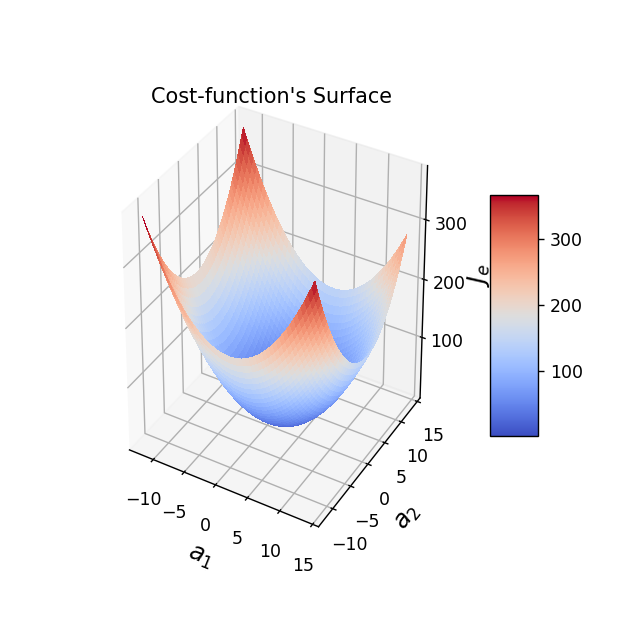

In [24]:
# Plot cost-function surface.
fig = plt.figure(figsize=(5,5))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#Show the plot.
plt.show()

plt.savefig("error_surface_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


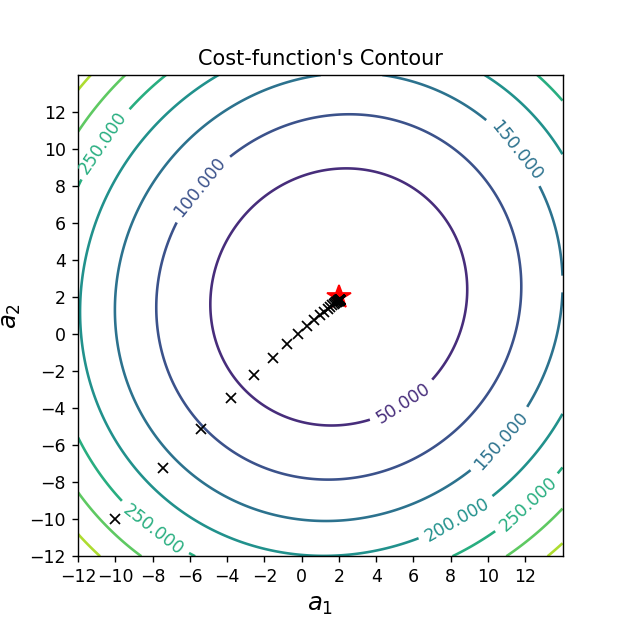

In [25]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=14)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-12, 14, step=2.0))
plt.yticks(np.arange(-12, 14, step=2.0))
plt.show()

plt.savefig("error_contour_bgd.png", dpi=600)

<IPython.core.display.Javascript object>


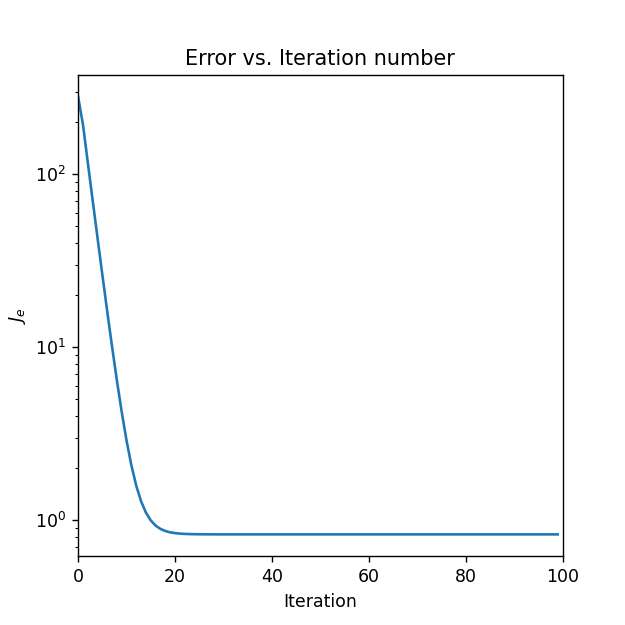

In [26]:
fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()

plt.savefig("error_vs_iteration_bgd.png", dpi=600)

In [27]:
# Optimum Values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_mb: ' + str(a[0, 0]))
print('a2_mb: ' + str(a[1, 0]))

a1_opt: 1.991132427011983
a2_opt: 2.0094165798740957
a1_mb: 2.0632971466518955
a2_mb: 1.8454689619789426


<IPython.core.display.Javascript object>


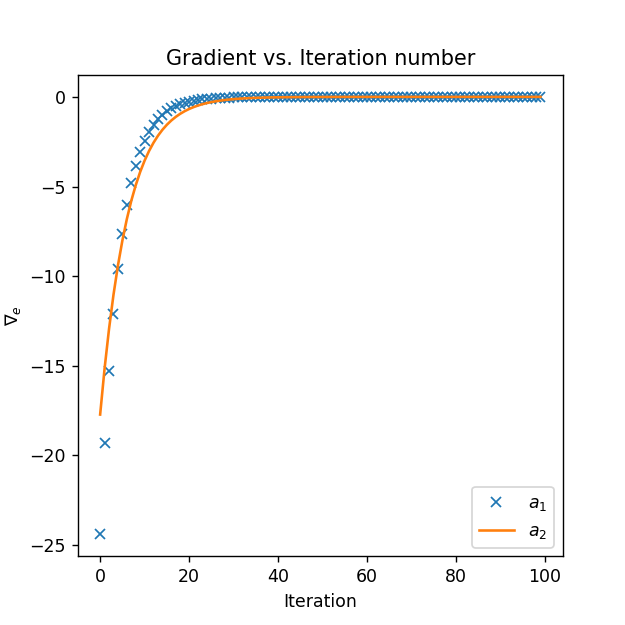

In [17]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, iteration), grad_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, iteration), grad_hist[1,:], label='$a_2$')
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()

In [18]:
'''
Como previsto pelo conteúdo apresentado, a implementação destes algoritmos trás benefícios e também algumas limitações agregadas
com cada um.

O algoritmo em batch apresenta boa convergência final, sendo bem preciso para atingir os resultados do mínimo global das funções
, porém com isso deve-se levar em conta o uso da CPU, levando uma grande análise numérica, assim sendo menos eficiente quanto
os dados de treinamento são muito grandes.
 
O estocástico  por sua vez é mais rápido, porém com isso deve-se abrir mão de uma perfeita precisão. A sua demanda 
computacional é menor por trabalhar com um exemplo por interação.

Já o algoritmo do mini-batch foi justamente proposto como um equilíbrio entre os dois acima citados, deste modo sendo uma média 
entre o uso de recursos computacionais e também a precisão de convergência.

'''

'\nComo previsto pelo conteúdo apresentado, a implementação destes algoritmos trás benefícios e também algumas limitações agregadas\ncom cada um.\n\nO algoritmo em batch apresenta boa convergência final, sendo bem preciso para atingir os resultados do mínimo global das funções\n, porém com isso deve-se levar em conta o uso da CPU, levando uma grande análise numérica, assim sendo menos eficiente quanto\nos dados de treinamento são muito grandes.\n \nO estocástico  por sua vez é mais rápido, porém com isso deve-se abrir mão de uma perfeita precisão. A sua demanda \ncomputacional é menor por trabalhar com um exemplo por interação.\n\nJá o algoritmo do mini-batch foi justamente proposto como um equilíbrio entre os dois acima citados, deste modo sendo uma média \nentre o uso de recursos computacionais e também a precisão de convergência.\n\n'